### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import Image
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

###Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
root='/gdrive/MyDrive/'
df=pd.read_csv(root+"AB_NYC_2019.csv")
df.head ()

Mounted at /gdrive


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Data Quality

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
print("The field name of df: ", df.columns)
print("Number of fields in df: ", len(df.columns))
print("Number of data in df: ", len(df))

The field name of df:  Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Number of fields in df:  16
Number of data in df:  48895



### Basic Stat Report from numeric Columns

In [ ]:
df[["price","latitude","longitude","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]].describe()

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,40.728949,-73.952170,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,0.054530,0.046157,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,40.499790,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,40.690100,-73.983070,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,40.723070,-73.955680,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,40.763115,-73.936275,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


### Insight about unique values

In [ ]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

###Making sure if any duplicatd values.

In [ ]:
df.duplicated().sum()

0

##Data Cleaning

###clean records with price = 0


In [ ]:
df = df[df['price']>0]

In [ ]:
df['price'].describe().T

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

###Checking for null values

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.isnull().mean() * 100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

###Dropping null values

In [ ]:
df = df.dropna()

### delete outlier

In [ ]:
df.shape

(34980, 18)

In [ ]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

In [ ]:
df.shape

(34980, 18)

## Data Analysis and Visualization

### Host ID

In [ ]:
df.host_id.value_counts().iloc[:5]

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

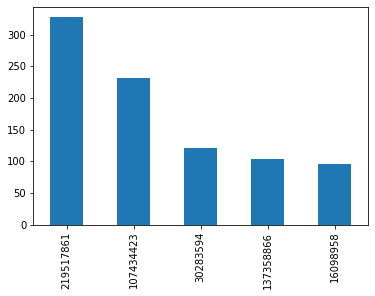

In [ ]:
df.host_id.value_counts().iloc[:5].plot(kind = 'bar')

###calculated_host_listings

In [ ]:
df.calculated_host_listings_count.value_counts().iloc[:5]

1    32303
2     6658
3     2853
4     1440
5      845
Name: calculated_host_listings_count, dtype: int64

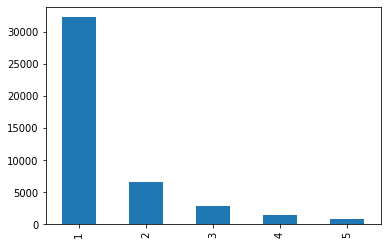

In [ ]:
df.calculated_host_listings_count.value_counts().iloc[:5].plot(kind = 'bar')

In [ ]:
df.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [ ]:
uni_calculated_host_listings_count = df.calculated_host_listings_count.unique()
print('Number of unique values in column "calculated_host_listings_count" of the dataframe : ')
print(uni_calculated_host_listings_count)

Number of unique values in column "calculated_host_listings_count" of the dataframe : 
[  6   2   1   4   3   5   7  13  28  11   8   9  52  18  15  19  10  39
  26  29  12  21  96  14  34  43 121  37  49  31  91  16  87  33  23  50
  20  25 232  17  47 103  65  30  27 327  32]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


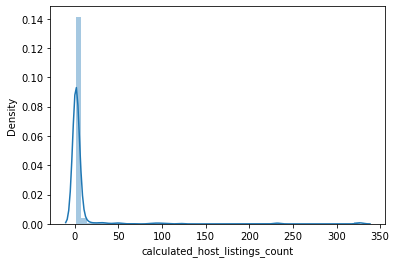

In [ ]:
sns.distplot(df['calculated_host_listings_count'])

In [ ]:
df_copy = df.copy()
df_copy[df['calculated_host_listings_count'] == 327]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


###Room Type 

In [ ]:
df.groupby(['room_type']).agg(['count', 'mean'])

id               host_id               latitude  \
                 count          mean   count          mean    count   
room_type                                                             
Entire home/apt  25409  1.843818e+07   25409  6.175593e+07    25409   
Private room     22326  1.946893e+07   22326  7.247514e+07    22326   
Shared room       1160  2.300378e+07    1160  1.026241e+08     1160   

                           longitude             price              \
                      mean     count       mean  count        mean   
room_type                                                            
Entire home/apt  40.728649     25409 -73.960696  25409  211.794246   
Private room     40.729208     22326 -73.942924  22326   89.780973   
Shared room      40.730514      1160 -73.943343   1160   70.127586   

                minimum_nights           number_of_reviews             \
                         count      mean             count       mean   
room_type                                                               
Entire home/apt          25409  8.506907             25409  22.842418   
Private room             22326  5.377900             22326  24.112962   
Shared room               1160  6.475000              1160  16.600000   

                reviews_per_month           calculated_host_listings_count  \
                            count      mean                          count   
room_type                                                                    
Entire home/apt             20332  1.306578                          25409   
Private room                17665  1.445209                          22326   
Shared room                   846  1.471726                           1160   

                           availability_365              
                      mean            count        mean  
room_type                                                
Entire home/apt  10.698335            25409  111.920304  
Private room      3.227717            22326  111.203933  
Shared room       4.662931             1160  162.000862

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

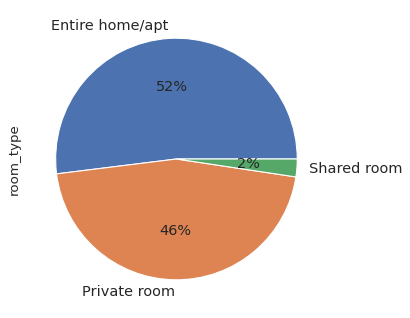

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

###neighbourhood Group

In [ ]:
df.groupby(['neighbourhood_group']).agg(['count', 'mean'])

id               host_id               latitude  \
                     count          mean   count          mean    count   
neighbourhood_group                                                       
Bronx                 1091  2.273492e+07    1091  1.056099e+08     1091   
Brooklyn             20104  1.825685e+07   20104  5.671526e+07    20104   
Manhattan            21661  1.877494e+07   21661  6.783062e+07    21661   
Queens                5666  2.175500e+07    5666  9.615680e+07     5666   
Staten Island          373  2.159747e+07     373  9.853360e+07      373   

                               longitude             price              \
                          mean     count       mean  count        mean   
neighbourhood_group                                                      
Bronx                40.848305      1091 -73.884552   1091   87.496792   
Brooklyn             40.685036     20104 -73.951190  20104  124.383207   
Manhattan            40.765062     21661 -73.974607  21661  196.875814   
Queens               40.731531      5666 -73.872775   5666   99.517649   
Staten Island        40.610225       373 -74.105805    373  114.812332   

                    minimum_nights           number_of_reviews             \
                             count      mean             count       mean   
neighbourhood_group                                                         
Bronx                         1091  4.560953              1091  26.004583   
Brooklyn                     20104  6.056556             20104  24.202845   
Manhattan                    21661  8.579151             21661  20.985596   
Queens                        5666  5.181433              5666  27.700318   
Staten Island                  373  4.831099               373  30.941019   

                    reviews_per_month            \
                                count      mean   
neighbourhood_group                               
Bronx                             876  1.837831   
Brooklyn                        16447  1.283212   
Manhattan                       16632  1.272131   
Queens                           4574  1.941200   
Staten Island                     314  1.872580   

                    calculated_host_listings_count             \
                                             count       mean   
neighbourhood_group                                             
Bronx                                         1091   2.233731   
Brooklyn                                     20104   2.284371   
Manhattan                                    21661  12.791330   
Queens                                        5666   4.060184   
Staten Island                                  373   2.319035   

                    availability_365              
                               count        mean  
neighbourhood_group                               
Bronx                           1091  165.758937  
Brooklyn                       20104  100.232292  
Manhattan                      21661  111.979410  
Queens                          5666  144.451818  
Staten Island                    373  199.678284

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

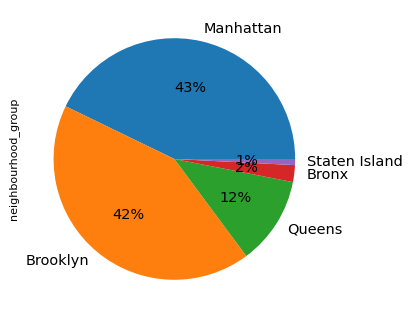

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

###Neighbourhoods:

In [ ]:
df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

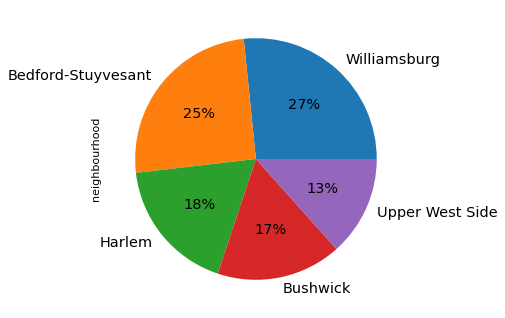

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

### Price

In [ ]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


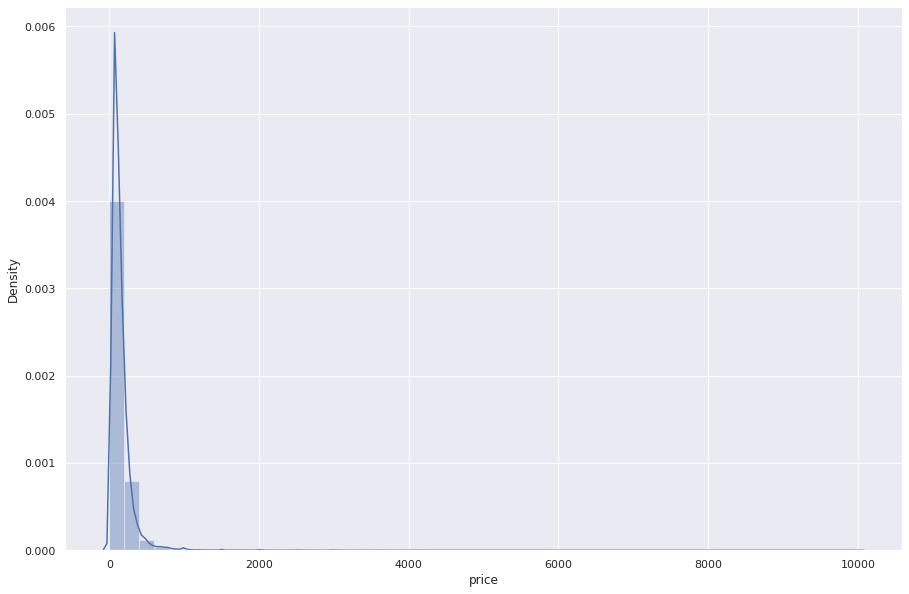

In [ ]:
sns.distplot(df['price'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


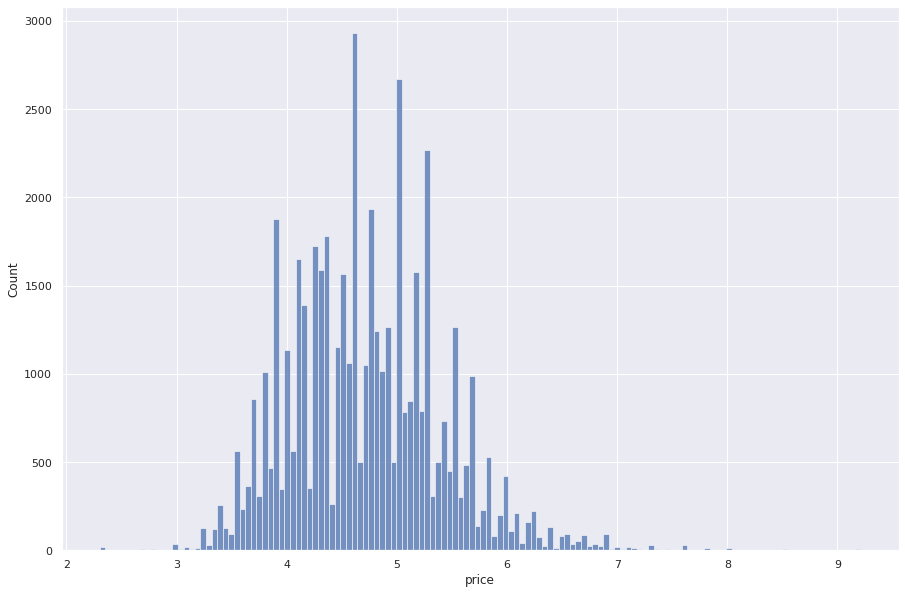

In [ ]:
sns.histplot(np.log(df['price']))

In [ ]:
df.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

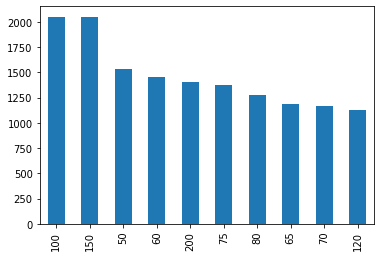

In [ ]:
df.price.value_counts().iloc[:10].plot(kind = 'bar')

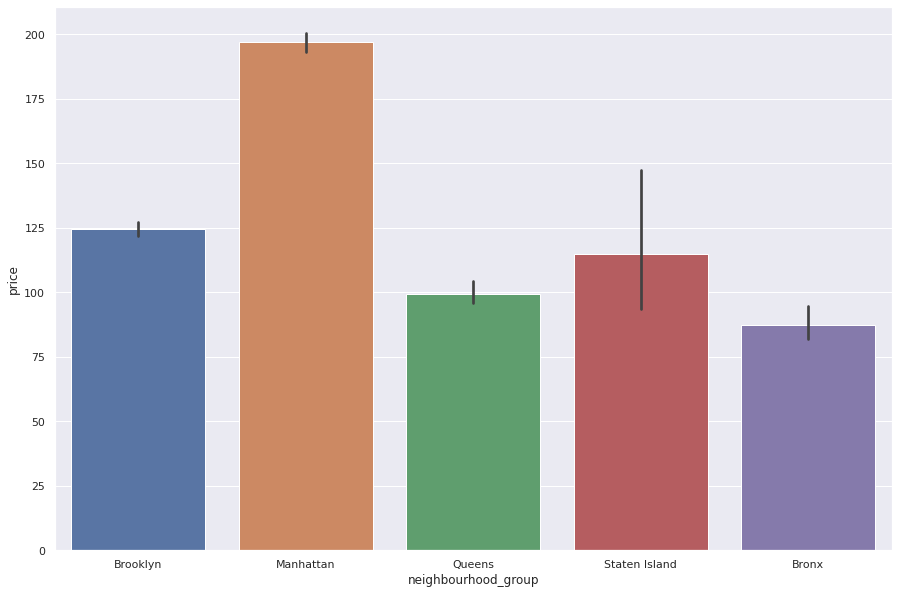

In [ ]:
sns.barplot(x=df['neighbourhood_group'],y=df['price'])

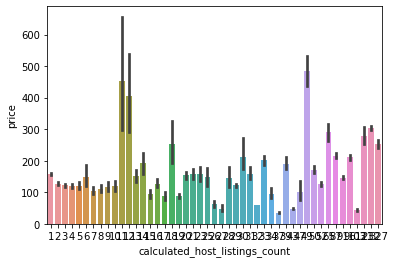

In [ ]:
sns.barplot(x=df['calculated_host_listings_count'],y=df['price'])

###'minimum_nights' column


In [ ]:
round(df['minimum_nights'].mean())

7

In [ ]:
df['minimum_nights'].mode()[0]

1

In [ ]:
min_n_30 = df[df['minimum_nights'] > 30]
min_n_30['neighbourhood_group'].value_counts()

Manhattan        422
Brooklyn         253
Queens            55
Bronx             13
Staten Island      4
Name: neighbourhood_group, dtype: int64

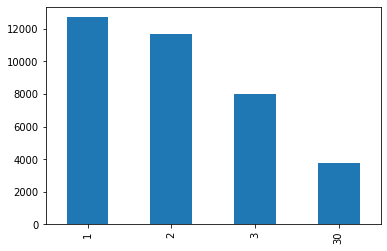

In [ ]:
df['minimum_nights'].value_counts().iloc[:4].plot(kind = 'bar')

###'number_of_reviews' column


In [ ]:
df['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

In [ ]:
df[df['number_of_reviews'] == 607]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293


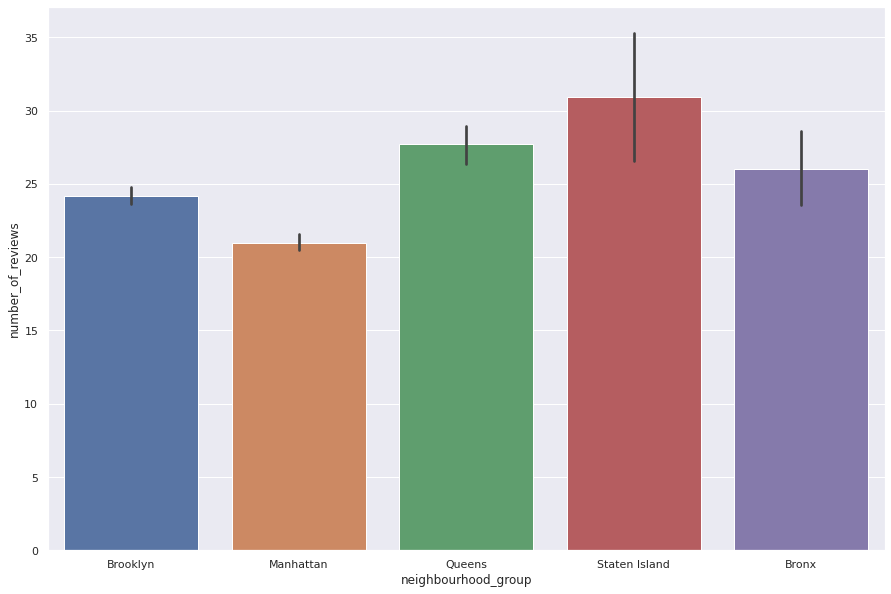

In [ ]:
sns.barplot(x=df['neighbourhood_group'],y=df['number_of_reviews'])

###Availablity

In [ ]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [ ]:
df[df['availability_365'] == 365].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.295000e+03,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.00000,1295.000000,841.000000,1295.000000,1295.0
mean,1.940195e+07,8.554698e+07,40.729014,-73.943275,250.769884,19.60000,10.220849,0.832545,13.158301,365.0
std,1.197265e+07,8.786960e+07,0.057781,0.059799,550.497373,65.05093,22.095983,1.112493,36.224171,0.0
min,2.539000e+03,2.787000e+03,40.507080,-74.242850,20.000000,1.00000,0.000000,0.010000,1.000000,365.0
25%,8.725256e+06,8.931349e+06,40.687990,-73.983210,72.000000,1.00000,0.000000,0.130000,1.000000,365.0
50%,2.065068e+07,4.634351e+07,40.730990,-73.954270,125.000000,3.00000,2.000000,0.410000,2.000000,365.0
75%,3.027040e+07,1.565055e+08,40.762095,-73.921715,225.000000,30.00000,10.000000,1.000000,7.000000,365.0
max,3.648315e+07,2.733930e+08,40.893740,-73.721730,9999.000000,1250.00000,183.000000,8.940000,327.000000,365.0


###reviews_per_month

In [ ]:
df[df['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

In [ ]:
df['reviews_per_month'].max()

58.5

In [ ]:
df_copy = df.copy()
df_copy[df['reviews_per_month'] == 58.5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


### correlation Matrix

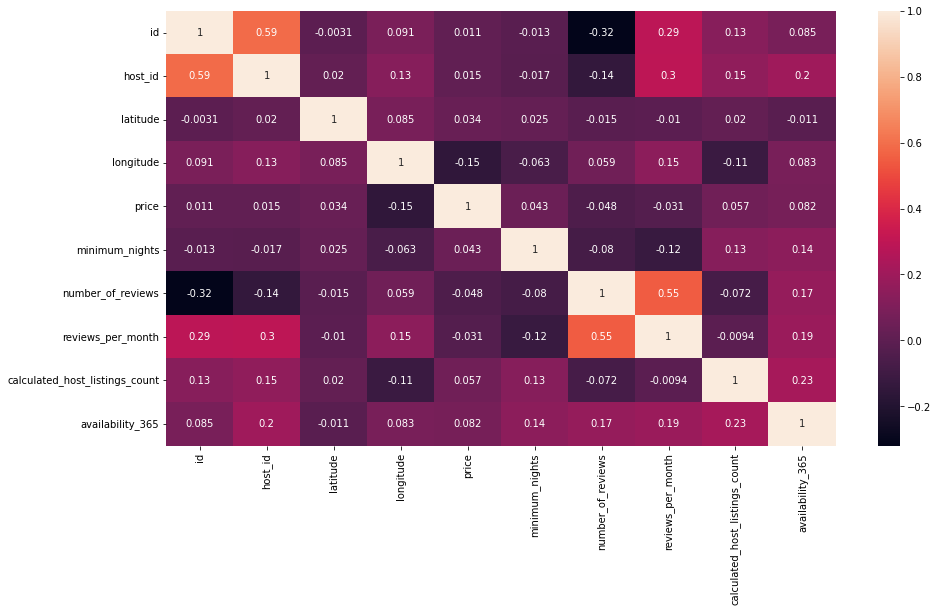

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

## Hypothesis Testing

### Test 1
    H0: the sample has a Gaussian distribution.
    H1: the sample does not have a Gaussian distribution.


In [ ]:
from scipy.stats import shapiro
data = df.price
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.300, p=0.000
Probably not Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


###Test 2 
 the Augmented Dickey-Fuller unit root test for price

H0: a unit root is present (series is non-stationary).
H1: a unit root is not present (series is stationary)

In [ ]:
 #Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = df.price
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-32.940, p=0.000
Probably Stationary


### Test 3

H0: the price and availability are independent.
H1: there is a dependency between the price and availability

In [ ]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df.price
data2 = df.availability_365
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.082, p=0.000
Probably dependent


### Test 4
 Student's t-test
 
H0: the means of the samples are equal.
H1: the means of the samples are unequal

In [ ]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = df.availability_365
data2 = df.price
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-32.248, p=0.000
Probably different distributions


### Test 5
 Mann-Whitney U Test

    H0: the distributions of both samples are equal.
    H1: the distributions of both samples are not equal.



In [ ]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = df.price
data2 = df.reviews_per_month
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=491930234.000, p=0.000
Probably different distributions
